https://www.kaggle.com/code/kanncaa1/heart-attack-analysis-prediction

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pawanbist/heart-attack-analysis-and-prediction-datasets")

print("Path to dataset files:", path)

100%|██████████| 4.11k/4.11k [00:00<00:00, 4.14MB/s]

Extracting files...
Path to dataset files: C:\Users\canoz\.cache\kagglehub\datasets\pawanbist\heart-attack-analysis-and-prediction-datasets\versions\1


### kütüphanelerin eklenmesi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#makine öğrenmesi algoritmaları için kütüphaneler
from sklearn.linear_model import LogisticRegression #logistik regresyon için
from sklearn.preprocessing import StandardScaler #standartlaştırma işlemleri için 
from sklearn.model_selection import train_test_split , GridSearchCV #veri setinin eğitim ve test olarak bölünmesi için
from sklearn.metrics import roc_curve, accuracy_score #model başarısının ölçülmesi için


import warnings
warnings.filterwarnings("ignore") # uyarıları kapatalım ki konsolda hata olarak algılamayalım








### veri seti yüklenmesi ve incelenmesi 

In [4]:
df=pd.read_csv("heart.csv")


In [ ]:
df.head(10) # cp değeri kategorik bir alan çünkü 0 1 2 değerlerini alabiliyor   

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.shape  ##  303 veri ve  14 stundan oluşan bir veri seti

(303, 14)

In [ ]:
df.describe() #genel özelliklere bakalım  
#chol değerinde ortalama 250 ortalama ise 50 3 alfa(250+3*50) dan basitçe 400 den yukaru değerler  aykırı değer diyebiliriz  

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr() ["output"]# sonuç ile stunlar arasında korelasyonlar

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

In [ ]:
df.info() #verileri ile ilgili bilgiler non değerler vs 
#!missing value yok gözküyor tüm değerler dolu 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### kayıp veri incelenmesi

In [ ]:
df.isnull().sum() #tüm null değerlerin sayısı

#! verimizde null değerler yok bunu tespit ettik 



age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### kategorik ve numerik değişken analizi 

In [ ]:
 #todo  kategorik veri anlizi demek bu verilerin veri seti içindeki dağılımına bakmaktır 

categorical_data = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output'] #  kategorik veriler  yani bir kategoriye göre olan verileri listeledik

df_categorical = df.loc[:,categorical_data] # kategorik verileri alıyoruz df olarak 


df_categorical # bakalım kategorik değerlere 

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


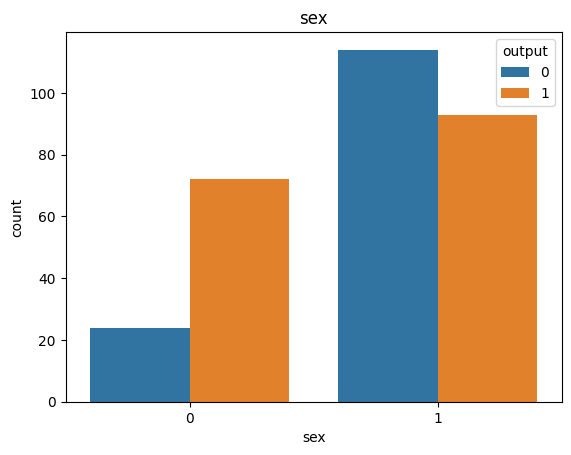

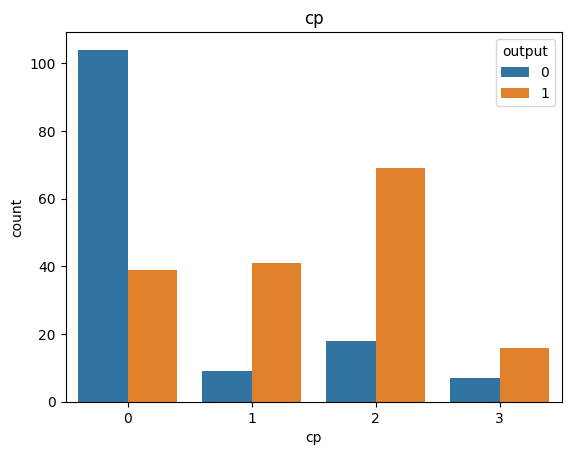

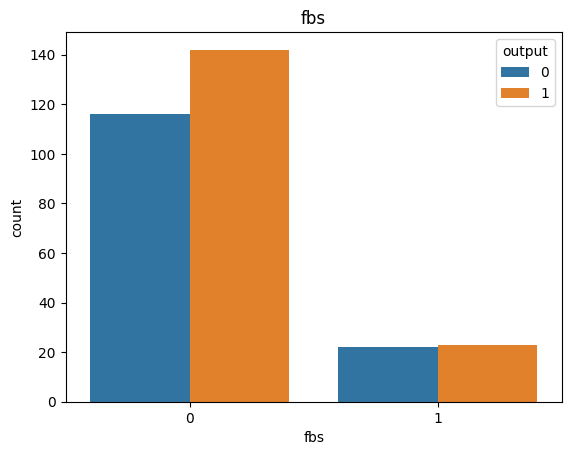

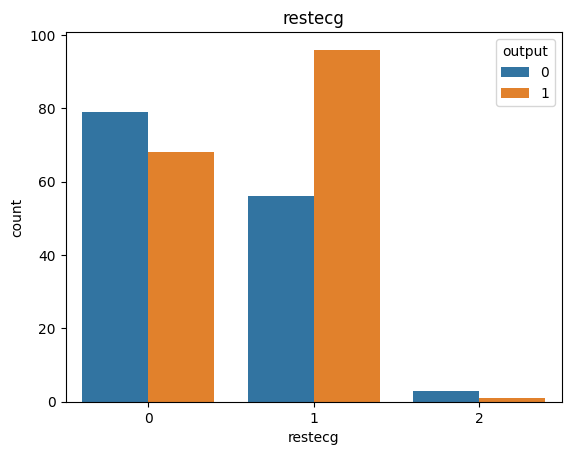

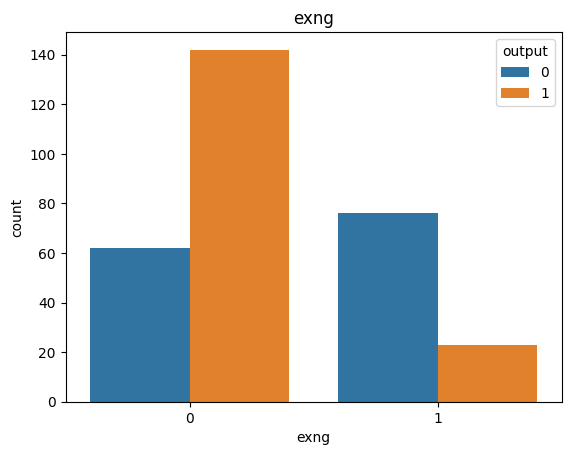

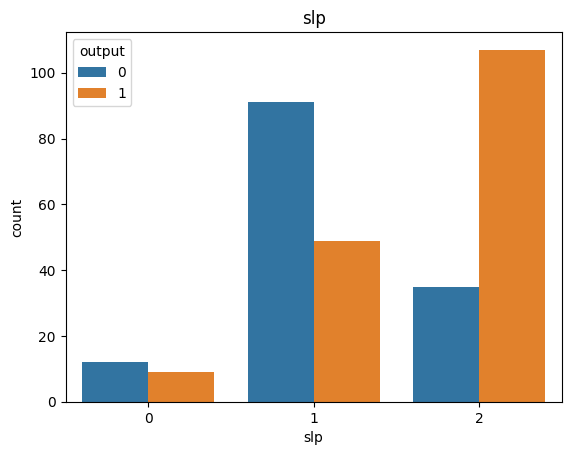

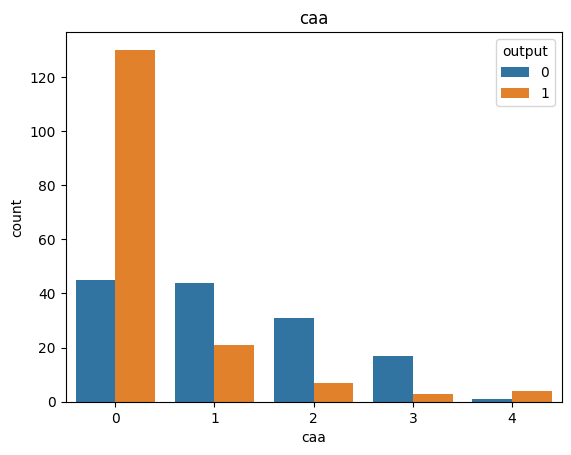

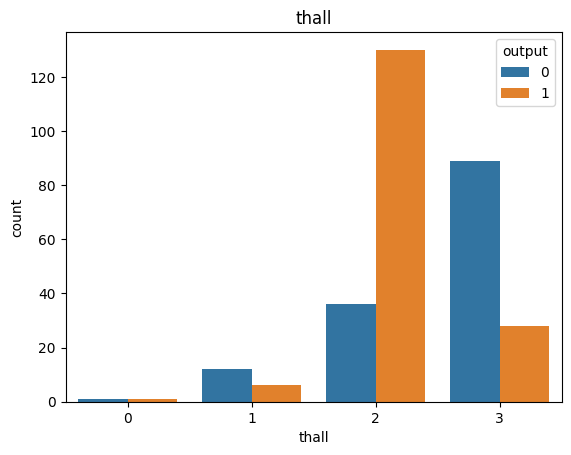

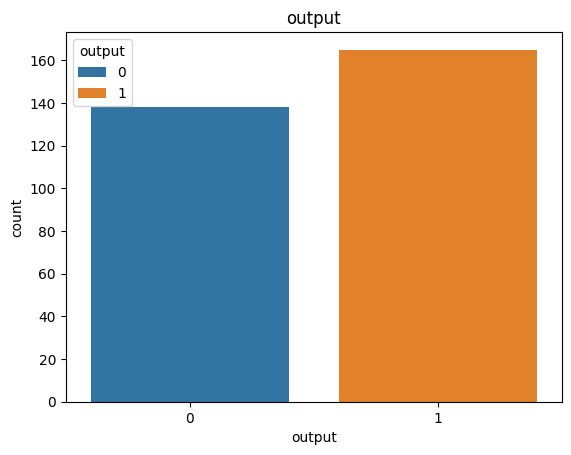

In [19]:
#kategorik verilerin output a göre dağılımlarına bakalım 

for i in categorical_data:
    plt.figure()
    sns.countplot(x=i, data=df_categorical,hue="output")
    plt.title(i)
    plt.show()

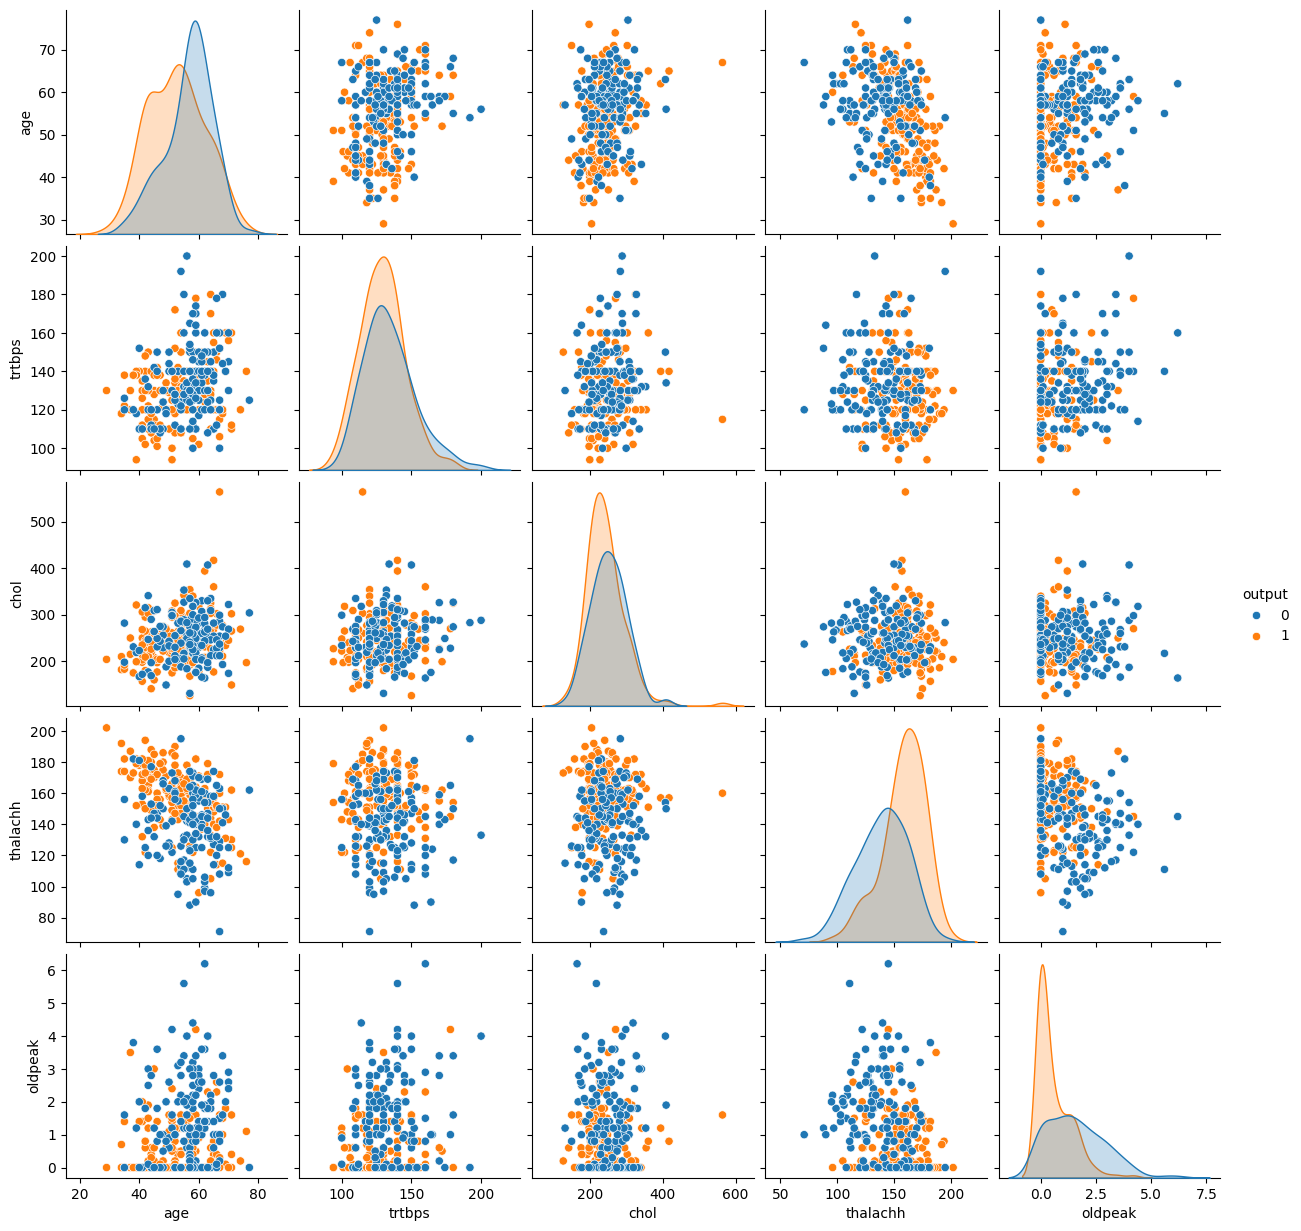

In [23]:
#nümerik değişkenlerin analizi yapılması



numeric_data=['age','trtbps','chol','thalachh','oldpeak','output'] #nümeric değişkenlerin isimleri
df_numeric=df.loc[:,numeric_data]
sns.pairplot(df_numeric , hue='output' , diag_kind='kde')
plt.show()


### eda: box ,swarm ,cat, correlasyon 

### aykırı değer tespiti

### modelleme 